# Rotating Coild Data Analysis for SI S15 Skew Excitation (Many)

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
from scipy.interpolate import interp1d
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
magfiles = {
    'S15-236': [
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111115.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111139.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111203.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111227.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111251.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111314.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111339.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111404.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111428.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111451.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111517.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111540.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111604.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111627.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111652.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111716.dat', 
        'S15-236_Estudos_Efeitos_QS_1/S15-236_S_BOA_135p0A_181018_111741.dat', 
    ],
    'S15-256': [
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130209.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130233.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130258.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130322.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130346.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130410.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130435.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130458.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130523.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130547.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130610.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130635.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130700.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130723.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130748.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130812.dat',
        'S15-256_Estudos_Efeitos_QS_1/S15-256_S_BOA_135p0A_181018_130836.dat',
    ],
    'S15-004': [
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155323.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155347.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155412.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155436.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155459.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155524.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155548.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155612.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155636.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155701.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155725.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155750.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155813.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155837.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155900.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155925.dat', 
        'S15-004_Estudos_Efeitos_QS_1/S15-004_S_BOA_135p0A_181017_155949.dat', 
    ], 
    'S15-248': [
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_174833.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_174858.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_174923.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_174947.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175011.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175035.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175100.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175124.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175147.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175211.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175235.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175300.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175323.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175347.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175412.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175436.dat',
        'S15-248_Estudos_Efeitos_QS_1/S15-248_S_BOA_135p0A_181017_175501.dat',
    ],
    
}

base_path = '/home/fac_files/lnls-ima/si-sextupoles-s15/model-07/measurement/magnetic/rotcoil/2018-10-18-sextupoles-ch-cv-qs/'
magnet_family = ''
magnet_coil = ''
data_set = ''


def load_rotcoil(serial, fname):
    path2 = base_path + magnet_family + serial + '/' + magnet_coil
    path3 = path2 + data_set + '/' + fname
    data = RotCoilData(path3, 1)
    return data
    
    
def load_data(magfiles):
    
    serials = tuple(magfiles.keys())
    
    shape = (len(serials), len(magfiles[serials[0]]))
    
    qs_coil_current_avg = np.zeros(shape)
    main_coil_current_avg = np.zeros(shape)
    nmpole_0 = np.zeros(shape)
    nmpole_1 = np.zeros(shape)
    nmpole_2 = np.zeros(shape)
    smpole_0 = np.zeros(shape)
    smpole_1 = np.zeros(shape)
    smpole_2 = np.zeros(shape)
    for i in range(len(serials)):
        files = magfiles[serials[i]]
        for j in range(len(files)):
            d = load_rotcoil(serials[i], files[j])
            main_coil_current_avg[i,j] = d.main_coil_current_avg
            qs_coil_current_avg[i,j] = d.qs_coil_current_avg
            nmpole_0[i,j] = d.intmpole_normal_avg[0]
            nmpole_1[i,j] = d.intmpole_normal_avg[1]
            nmpole_2[i,j] = d.intmpole_normal_avg[2]
            smpole_0[i,j] = d.intmpole_skew_avg[0]
            smpole_1[i,j] = d.intmpole_skew_avg[1]
            smpole_2[i,j] = d.intmpole_skew_avg[2]
    return serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2, 


data = load_data(magfiles)

<IPython.core.display.Javascript object>


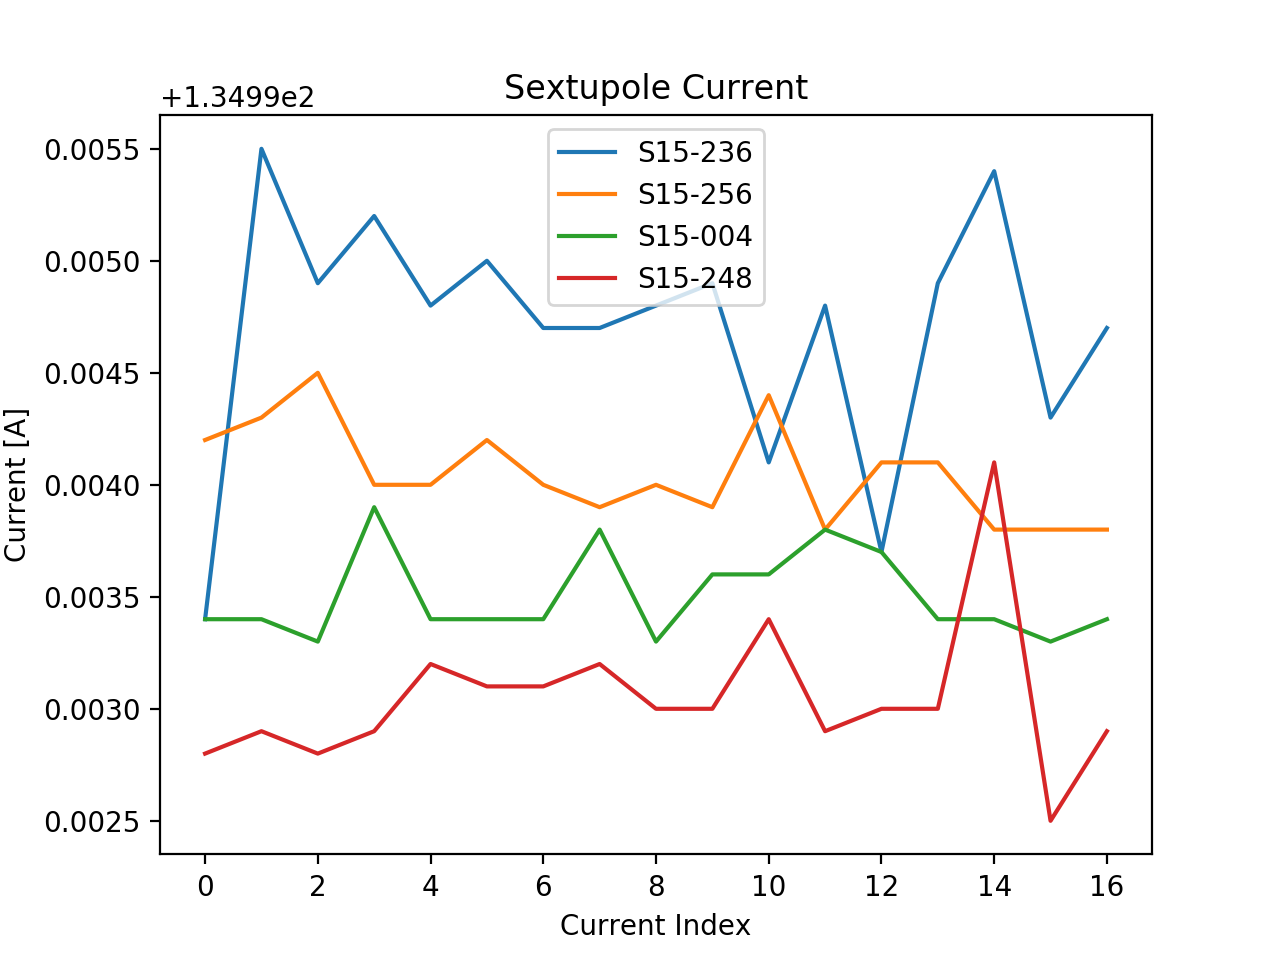

In [3]:
# Sextupole Current

serials, tdata = data[0], data[1]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Sextupole Current')
plt.legend()
plt.show()    

<IPython.core.display.Javascript object>


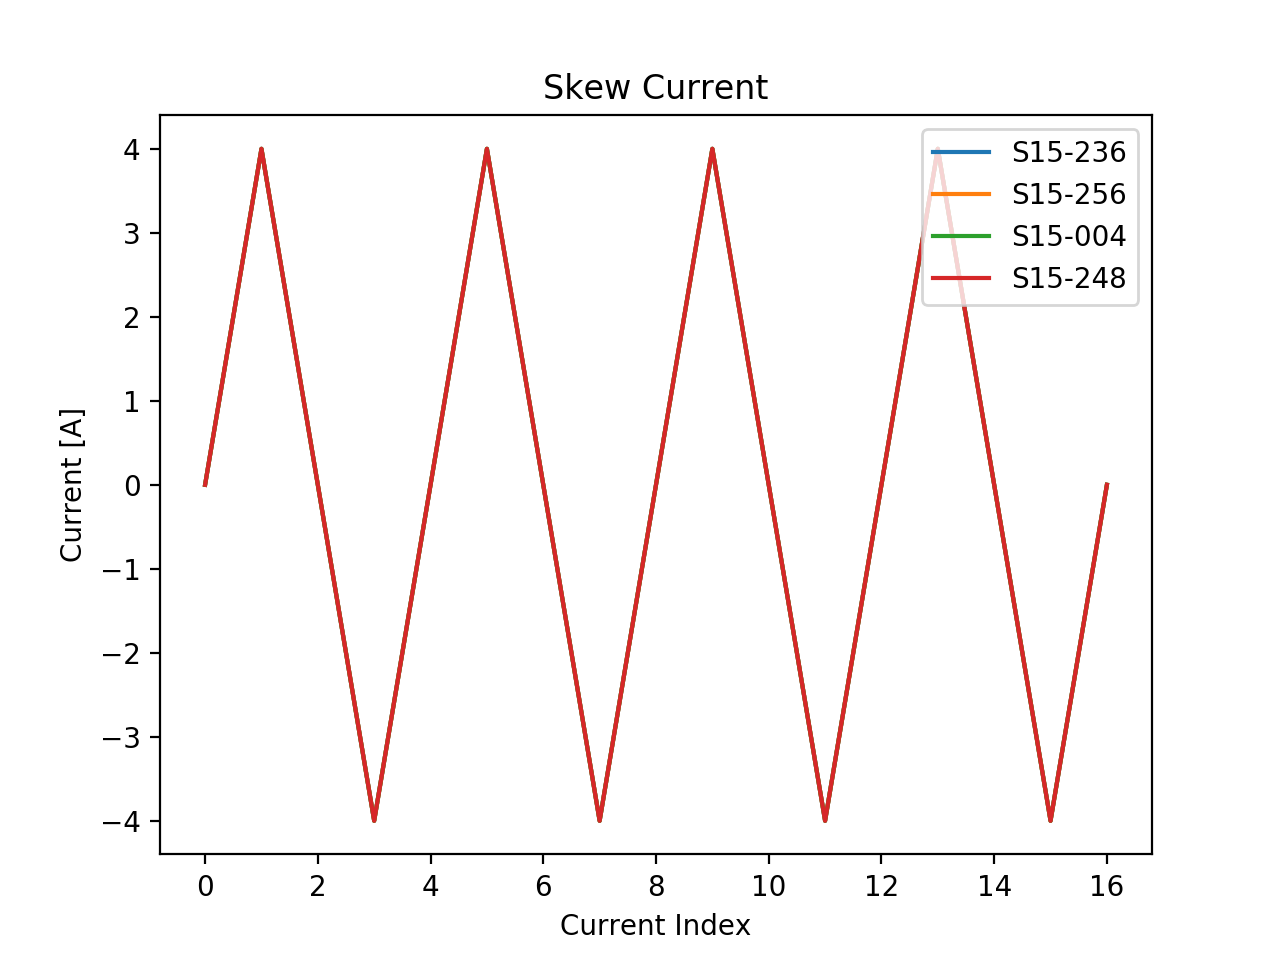

Currents:
index 00 :  -0.00 A
index 01 :  +4.00 A
index 02 :  -0.00 A
index 03 :  -4.00 A
index 04 :  +0.00 A
index 05 :  +4.00 A
index 06 :  -0.00 A
index 07 :  -4.00 A
index 08 :  -0.00 A
index 09 :  +4.00 A
index 10 :  +0.00 A
index 11 :  -4.00 A
index 12 :  -0.00 A
index 13 :  +4.00 A
index 14 :  +0.00 A
index 15 :  -4.00 A
index 16 :  +0.00 A


In [4]:
# Skew Coil Current

serials, tdata = data[0], data[2]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Skew Current')
plt.legend()
plt.show()

print('Currents:')
avg = np.mean(tdata,0)
for i in range(len(avg)):
    print('index {:02d} : {:+6.2f} A'.format(i, avg[i]))

<IPython.core.display.Javascript object>


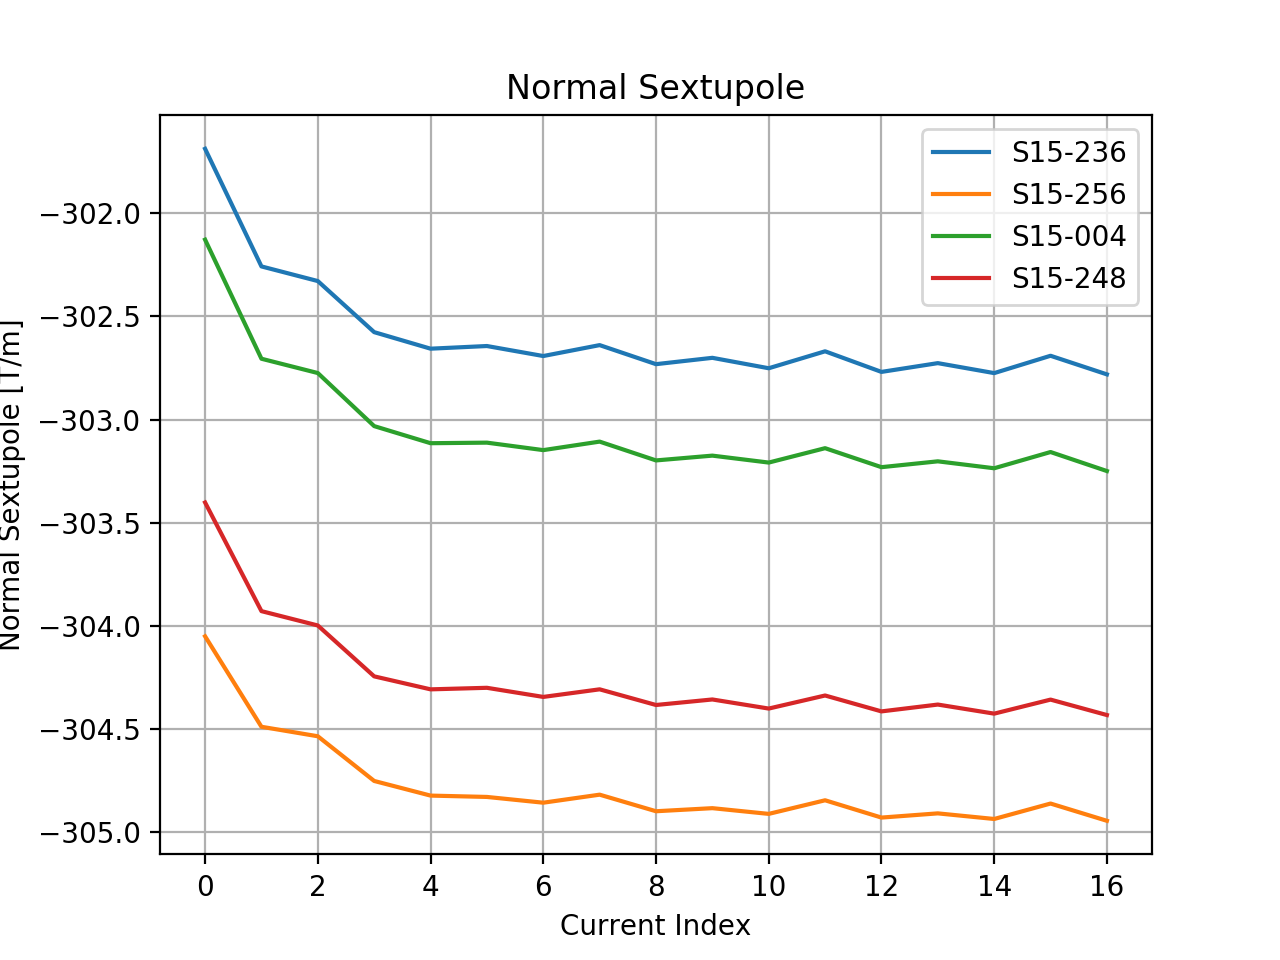

<IPython.core.display.Javascript object>


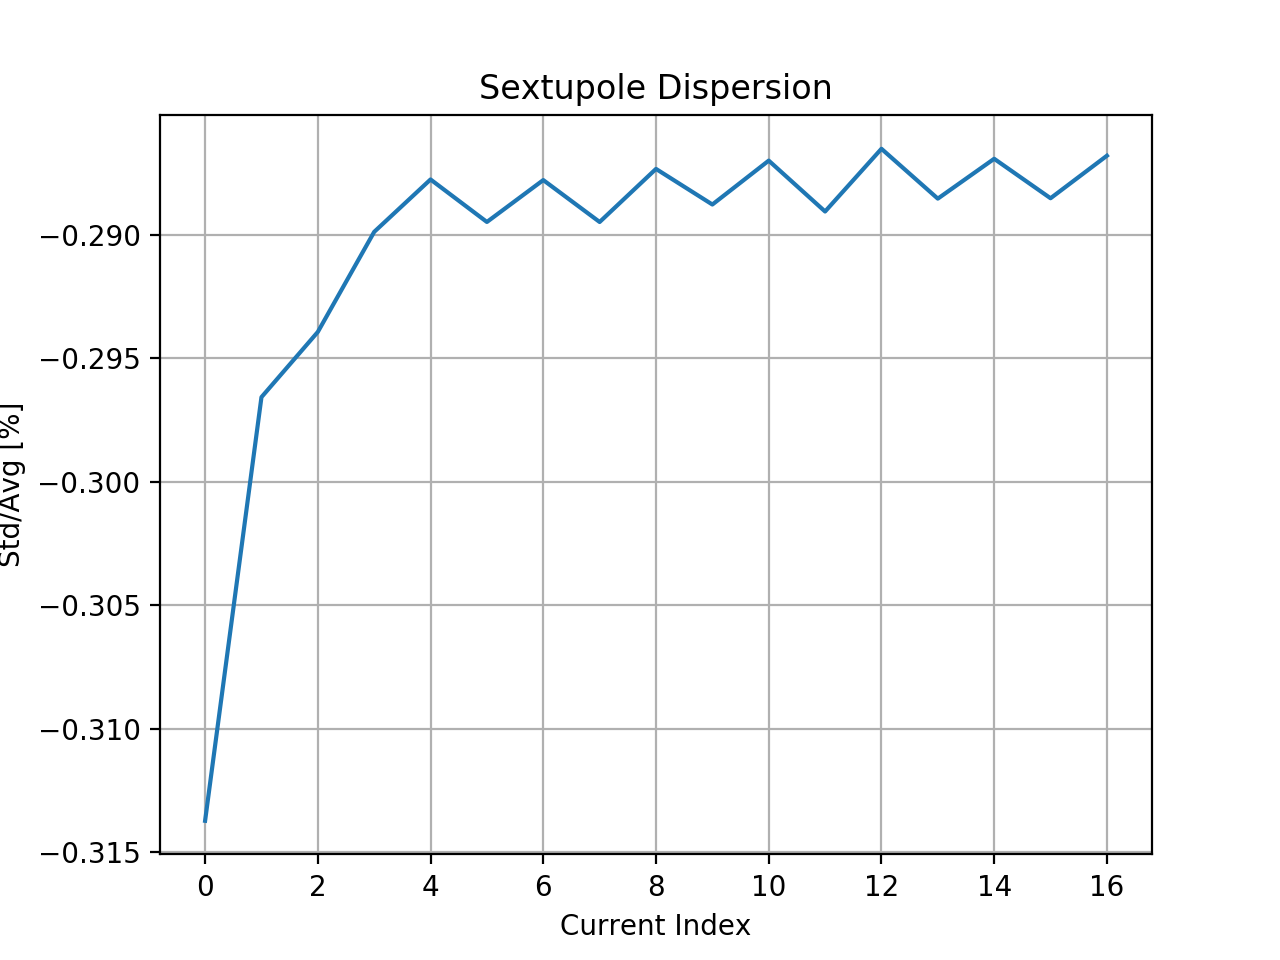

<IPython.core.display.Javascript object>


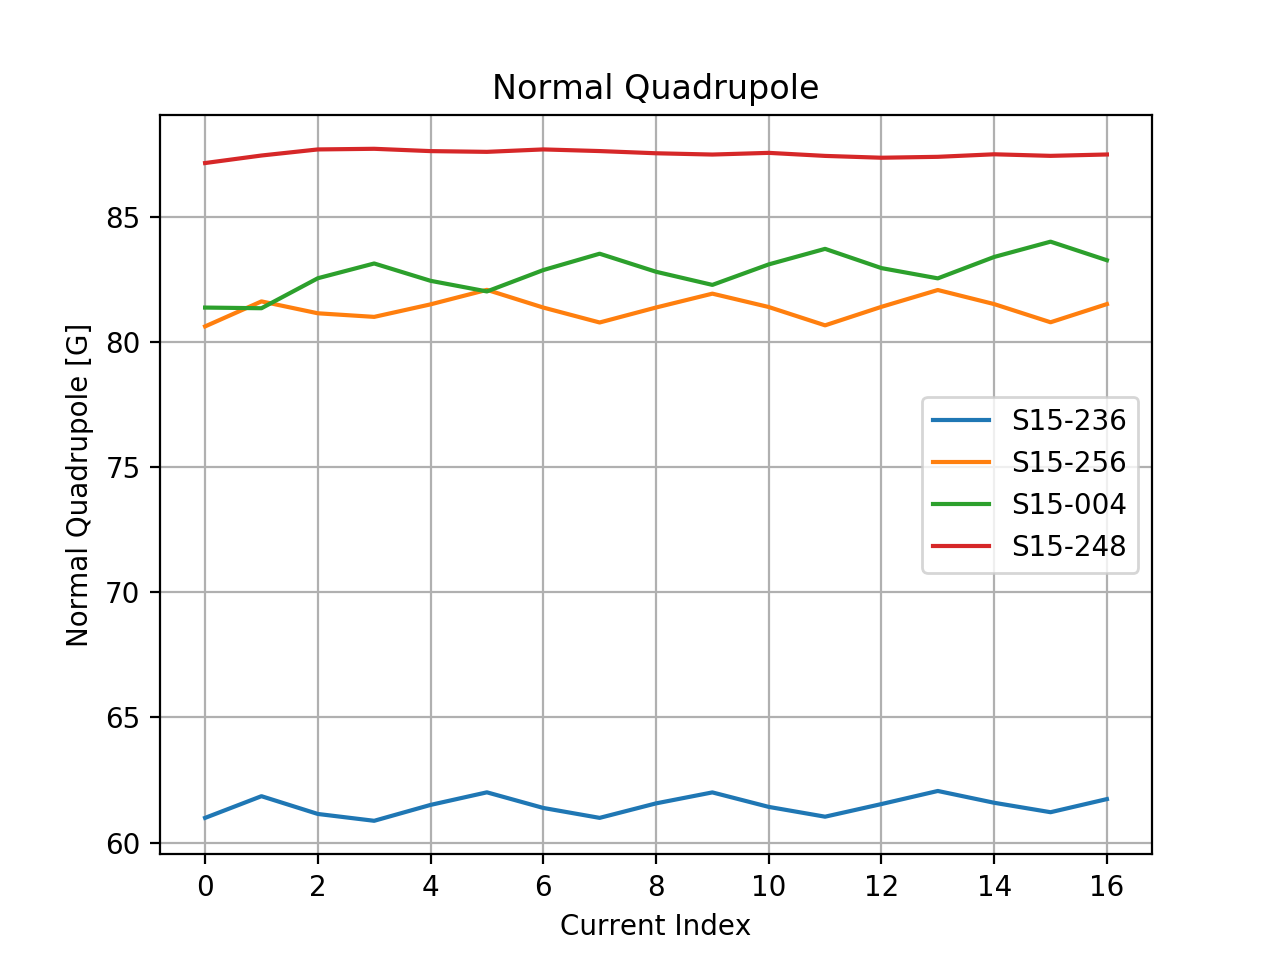

<IPython.core.display.Javascript object>


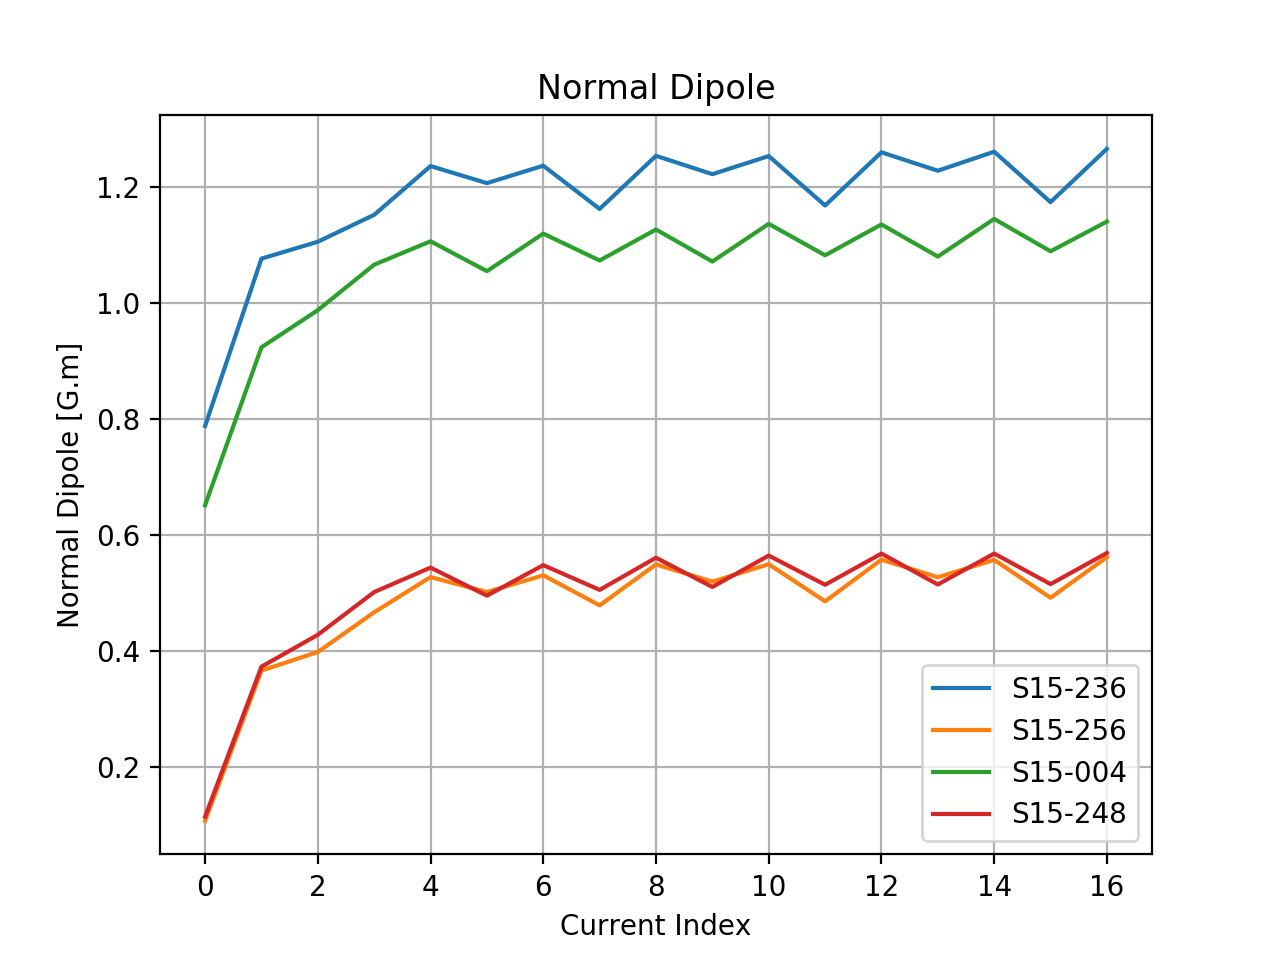

In [5]:
# Normal Sextupole
serials, tdata = data[0], data[5]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Sextupole [T/m]')
plt.title('Normal Sextupole')
plt.legend()
plt.grid()
plt.show()

avg = np.mean(tdata, 0)
std = np.std(tdata, 0)
plt.figure()
plt.plot(100*std/avg)
plt.xlabel('Current Index')
plt.ylabel('Std/Avg [%]')
plt.title('Sextupole Dispersion')
plt.grid()
plt.show()
# print(std/avg)

# Normal Quadrupole
serials, tdata = data[0], data[4]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Quadrupole [G]')
plt.title('Normal Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Normal Dipole
serials, tdata = data[0], data[3]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Dipole [G.m]')
plt.title('Normal Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


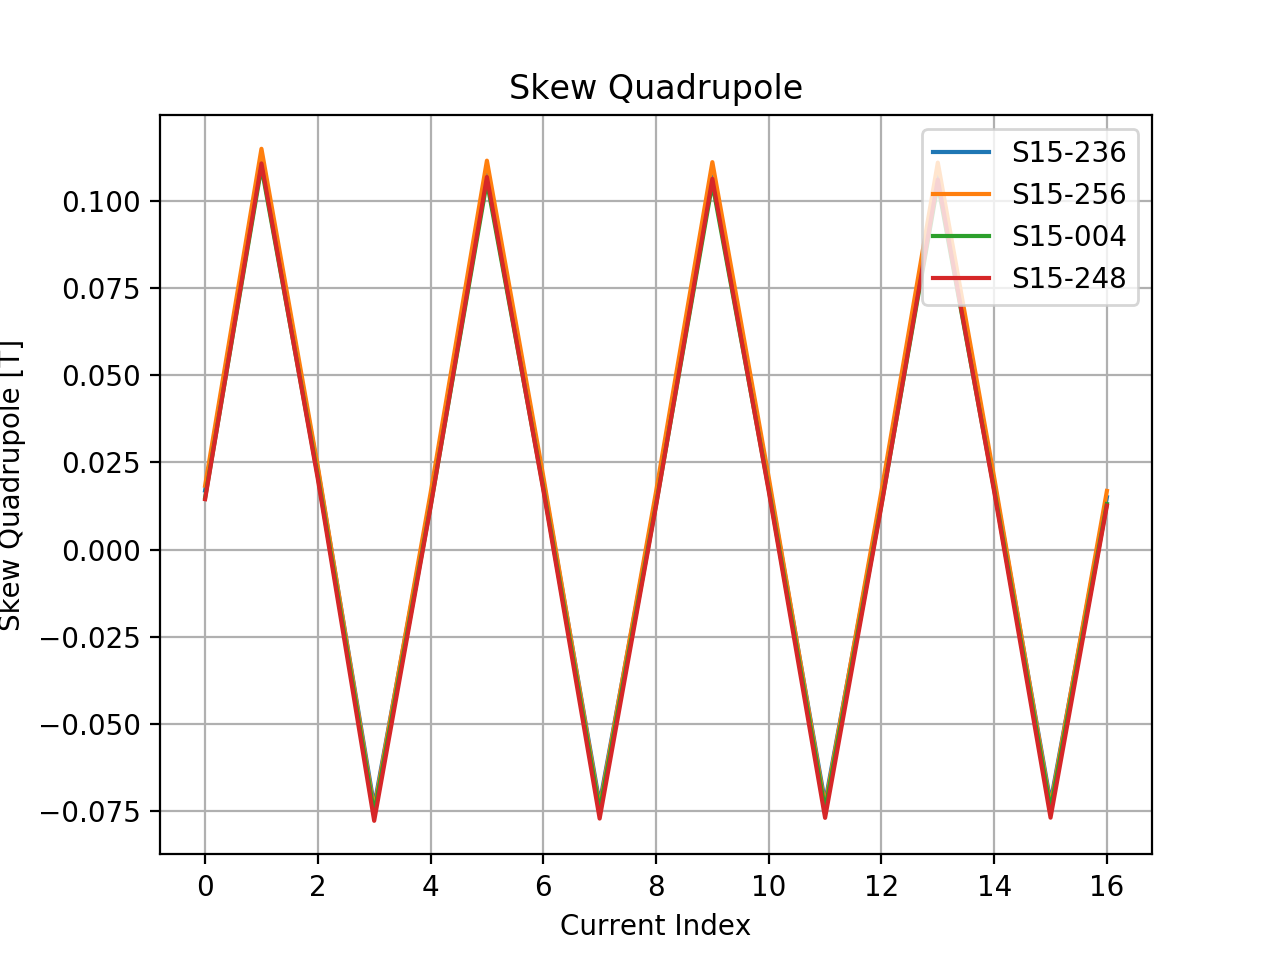

<IPython.core.display.Javascript object>


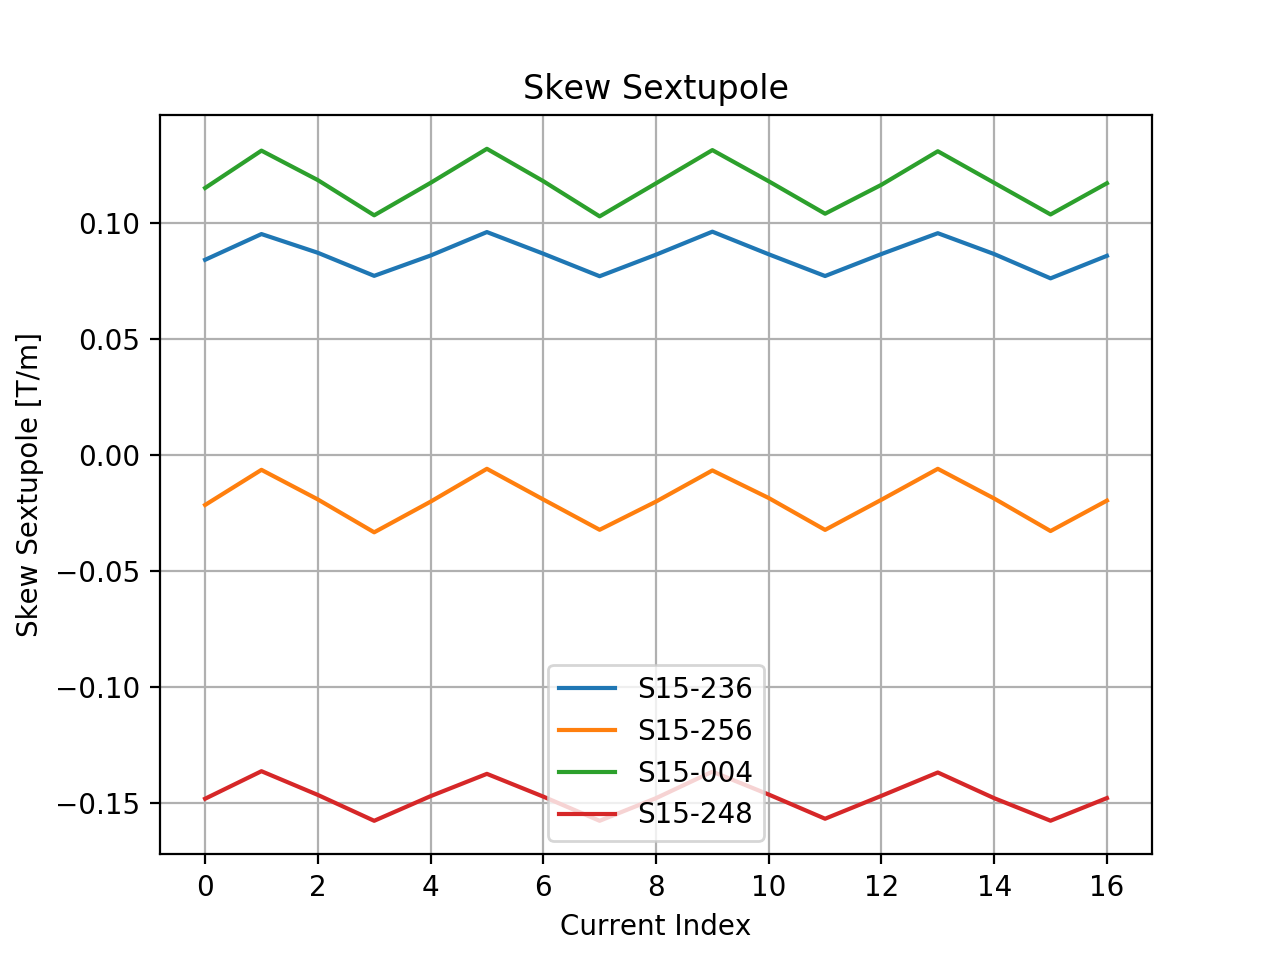

<IPython.core.display.Javascript object>


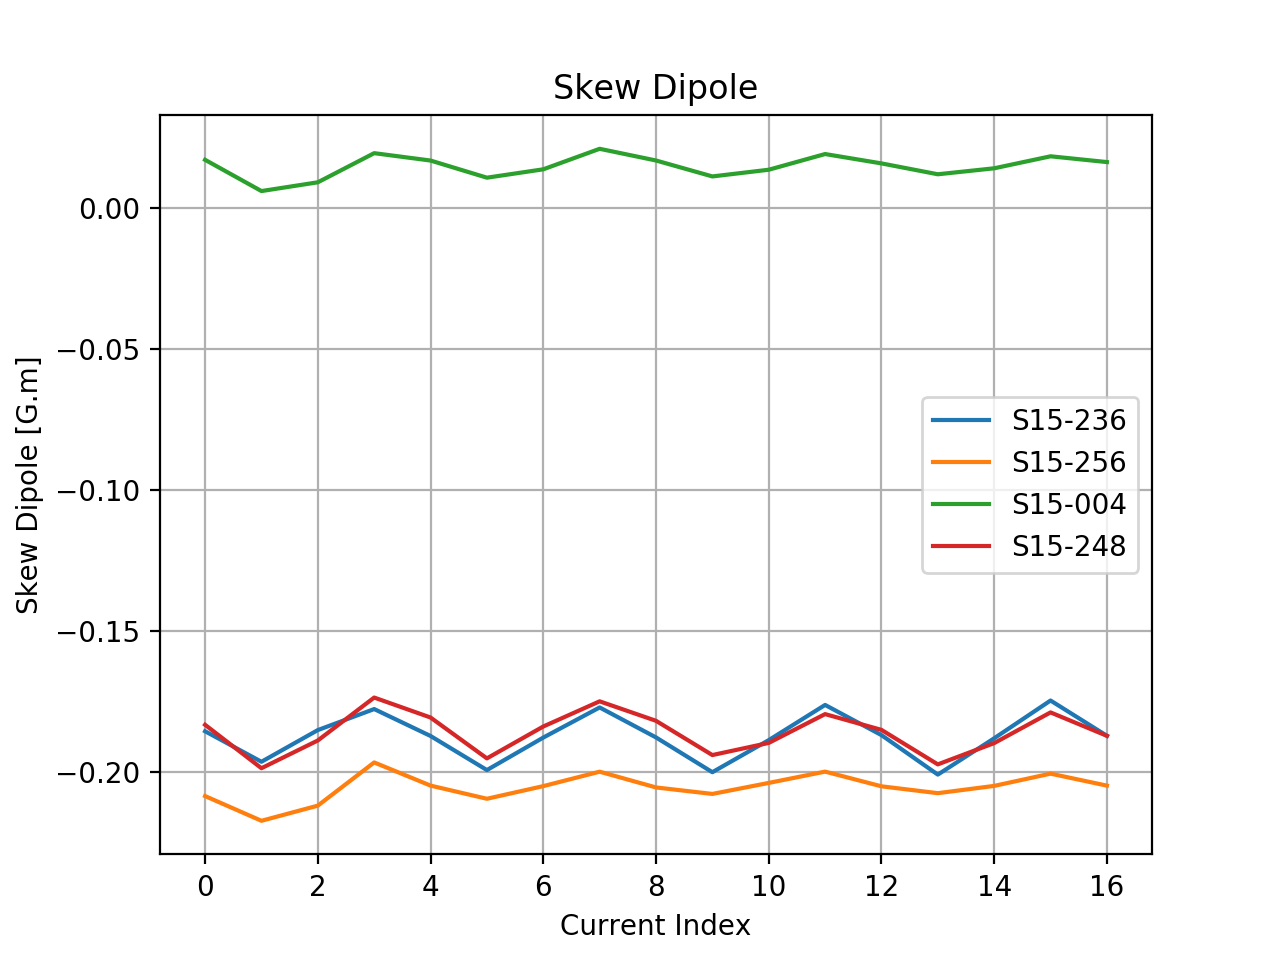

In [47]:
# Skew Quadrupole
serials, tdata = data[0], data[7]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Quadrupole [T]')
plt.title('Skew Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Skew Sextupole
serials, tdata = data[0], data[8]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Sextupole [T/m]')
plt.title('Skew Sextupole')
plt.legend()
plt.grid()
plt.show()

# Skew Dipole
serials, tdata = data[0], data[6]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Dipole [G.m]')
plt.title('Skew Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


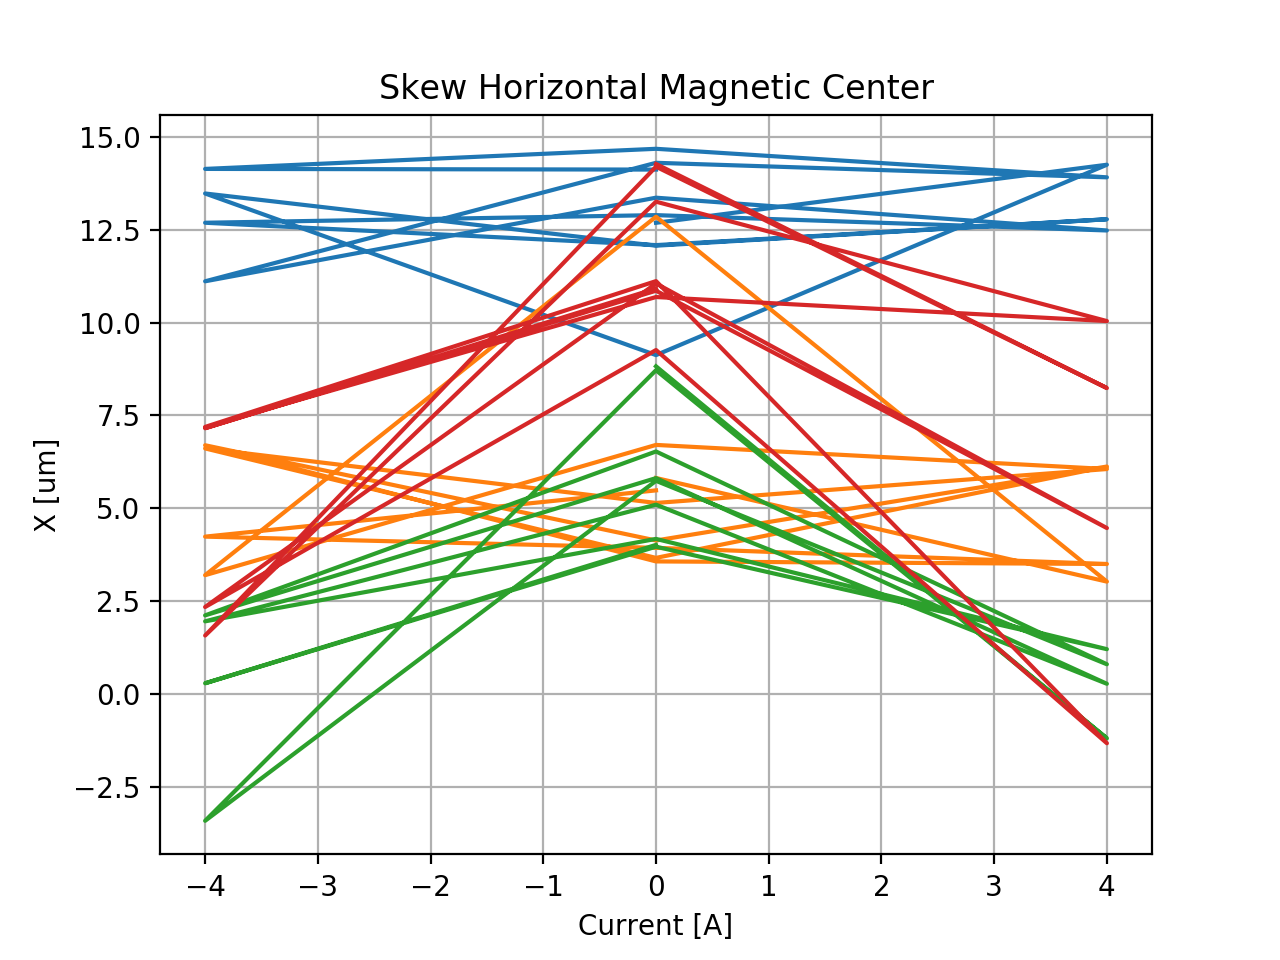

<IPython.core.display.Javascript object>


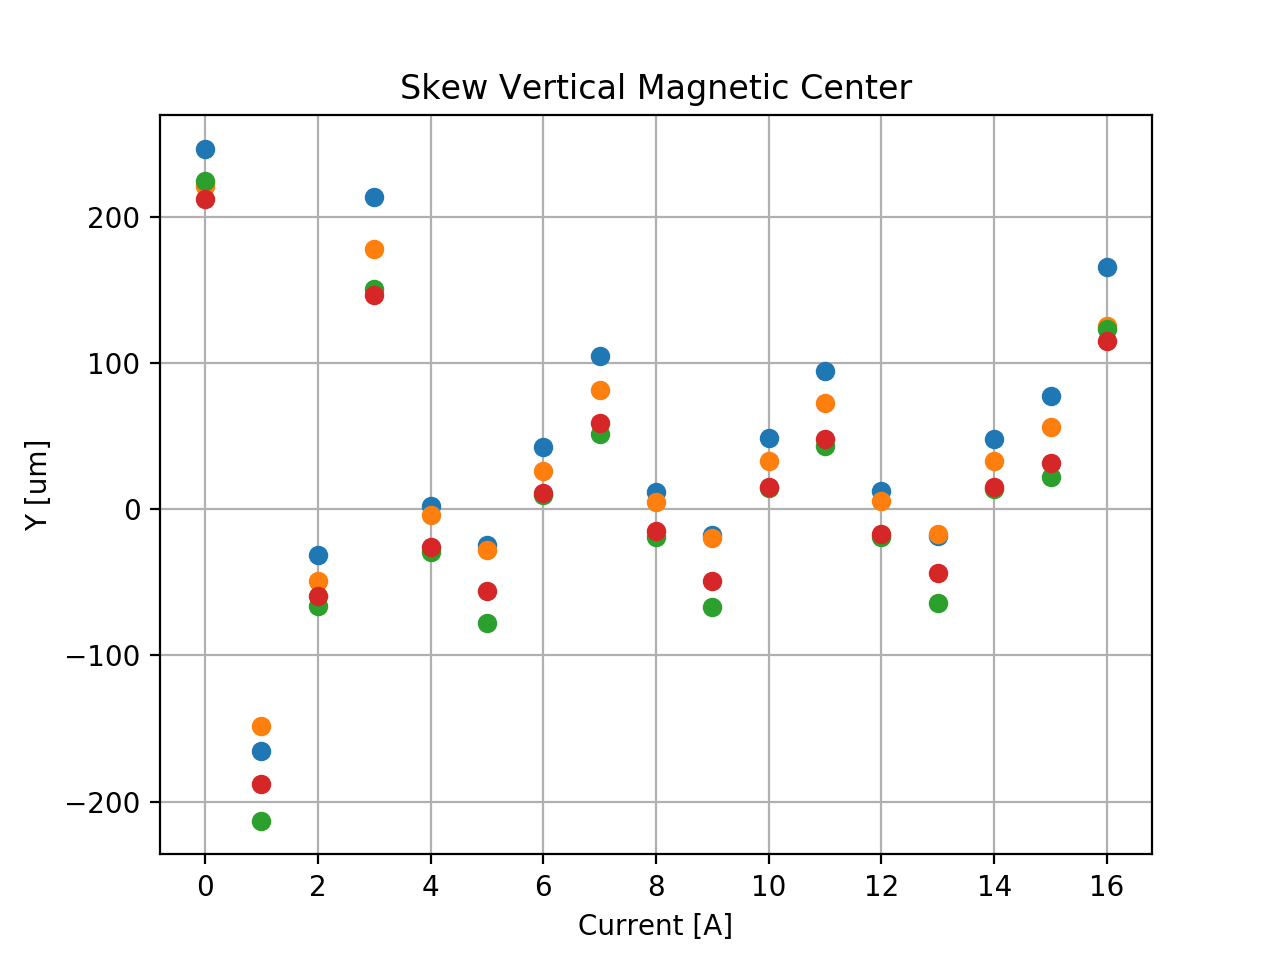

<IPython.core.display.Javascript object>


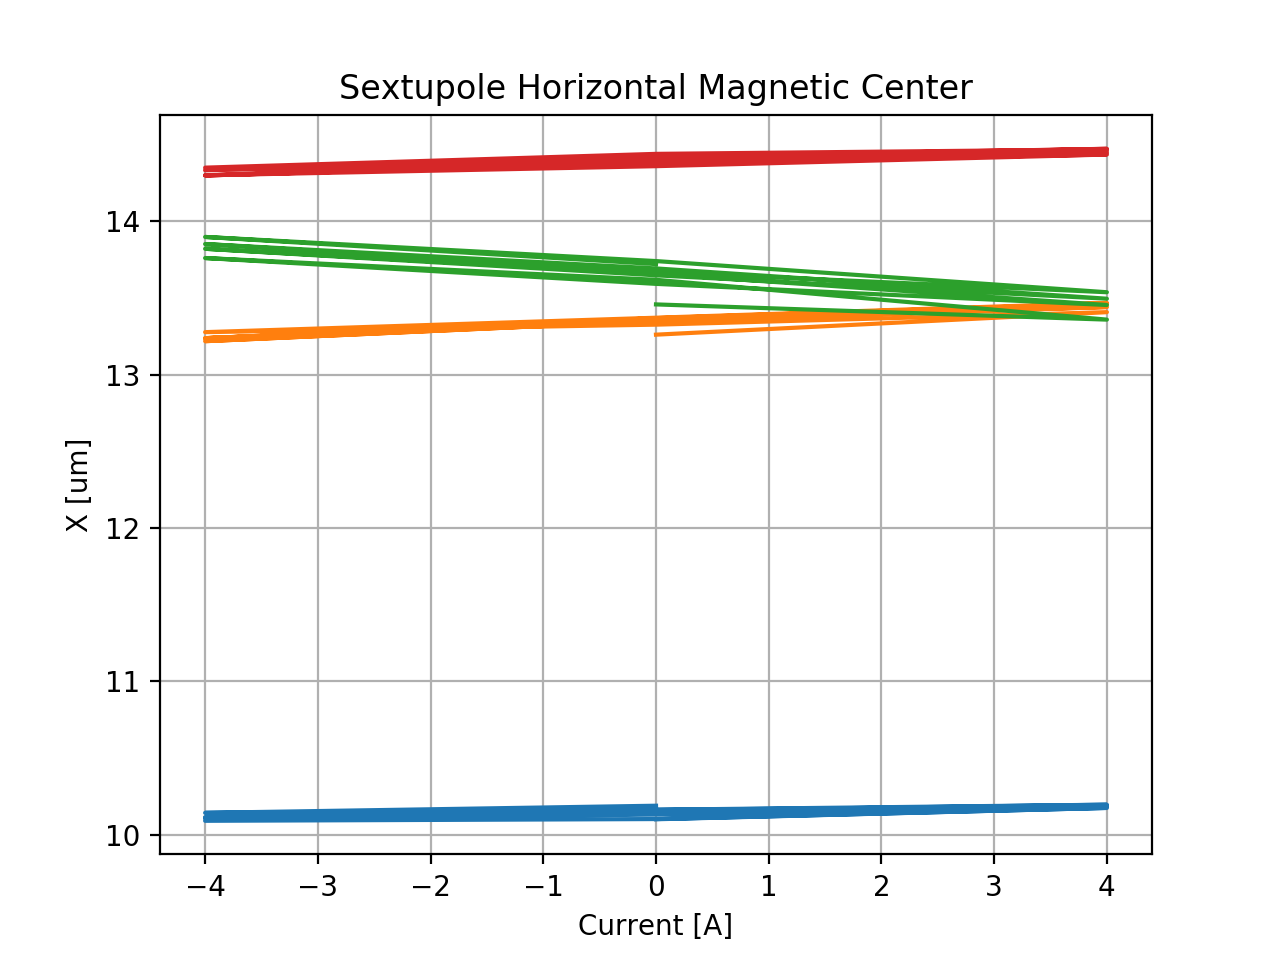

<IPython.core.display.Javascript object>


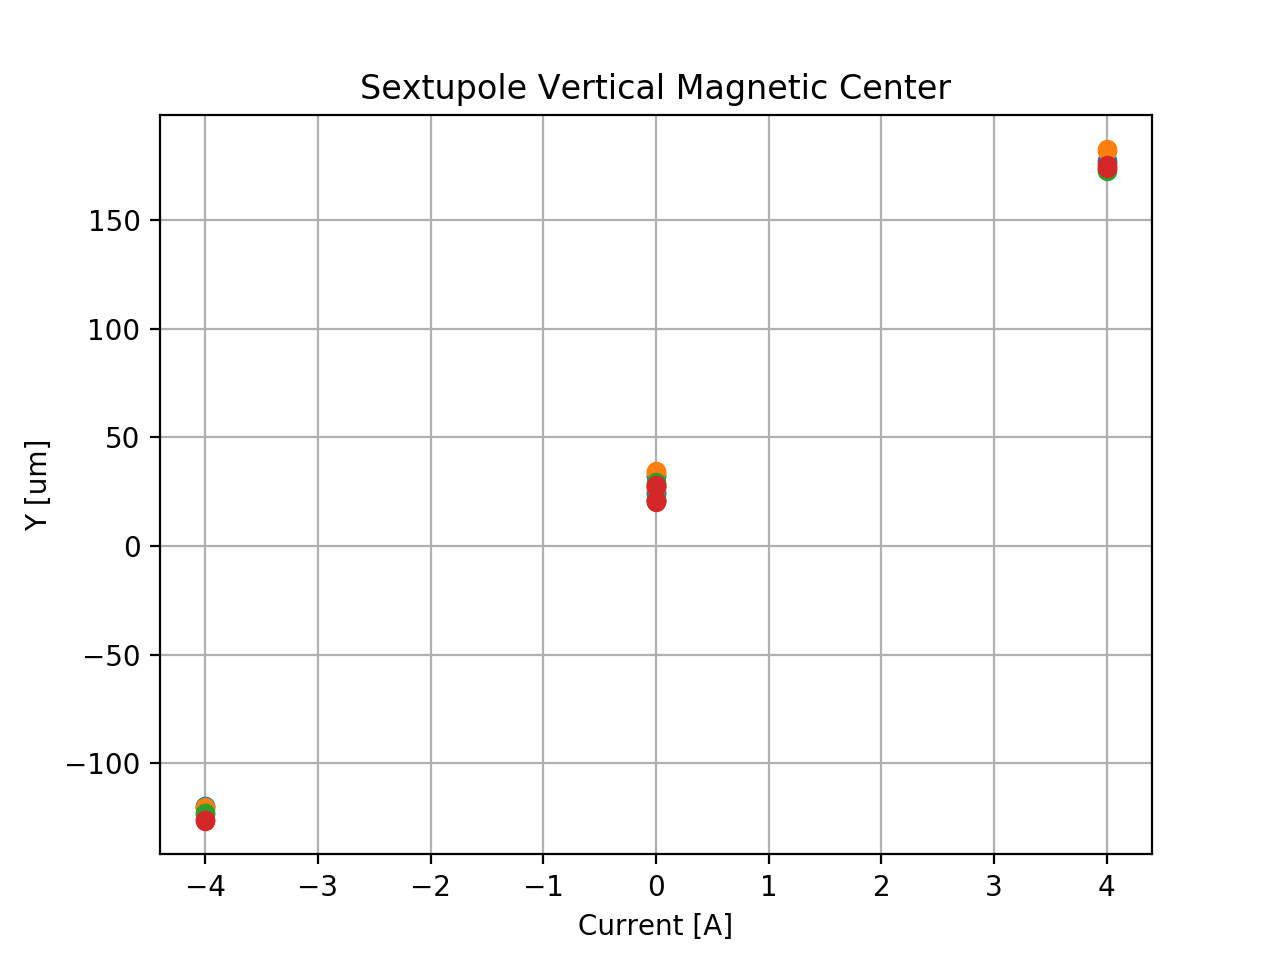

In [6]:
serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2 = data
    
shape = main_coil_current_avg.shape

ind = np.array([i for i in range(shape[1])])
step = 1.0

zskew = []
zsext = []
Il = []
for j in range(shape[0]):
    D = nmpole_0[j,:] + 1j * smpole_0[j,:]
    Q = nmpole_1[j,:] + 1j * smpole_1[j,:]
    S = nmpole_2[j,:] + 1j * smpole_2[j,:]
    fD = interp1d(ind, D, kind='cubic', fill_value='extrapolate')
    fQ = interp1d(ind, Q, kind='cubic', fill_value='extrapolate')
    fS = interp1d(ind, S, kind='cubic', fill_value='extrapolate')
    fI = interp1d(ind, qs_coil_current_avg[j,:], kind='cubic', fill_value='extrapolate')
    Dl = (fD(ind + step) - fD(ind - 1*step/2))/step
    Ql = (fQ(ind + step) - fQ(ind - 1*step/2))/step
#     Dl = fD(ind) - np.mean(fD(ind[4:]))
#     Ql = fQ(ind) - np.mean(fQ(ind[4:]))
    QlSext = fQ(ind + 0*step)
    SlSext = fS(ind + 0*step)
    Il.append(fI(ind))  
    zskew.append(-Dl/Ql)
    zsext.append(-QlSext/SlSext/2.0)
    

# plot skew center 

plt.figure()
for i in range(len(zskew)):
    z = zskew[i]
    plt.plot(Il[i], 1e6*np.real(z))
plt.xlabel('Current [A]')
plt.ylabel('X [um]')
plt.grid()
plt.title('Skew Horizontal Magnetic Center')
plt.show()

plt.figure()
for i in range(len(zskew)):
    z = zskew[i]
#     plt.plot(Il[i][4:], 1e6*np.imag(z)[4:], 'o')
    plt.plot(ind, 1e6*np.imag(z), 'o')
plt.xlabel('Current [A]')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Skew Vertical Magnetic Center')
plt.show()


# plot sextupole center 

plt.figure()
for i in range(len(zsext)):
    z = zsext[i]
    z2 = zskew[i]
    plt.plot(Il[i], 1e6*np.real(z))
#     plt.plot(1e6*np.real(z2), 1e6*np.real(z))
plt.xlabel('Current [A]')
plt.ylabel('X [um]')
plt.grid()
plt.title('Sextupole Horizontal Magnetic Center')
plt.show()

plt.figure()
for i in range(len(zsext)):
    z = zsext[i]
    z2 = zskew[i]
    plt.plot(Il[i][4:], 1e6*np.imag(z)[4:], 'o')
#     plt.plot(1e6*np.imag(z2), 1e6*np.imag(z))
plt.xlabel('Current [A]')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Sextupole Vertical Magnetic Center')
plt.show()